In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point, Polygon

In [2]:
import descartes

ModuleNotFoundError: No module named 'descartes'

In [3]:
%matplotlib inline

In [5]:
melb_map=gpd.read_file(r'C:\Melbourne_Escooter\RealDataset\shapefiles\Postcodes\geo_export_41ae1b62-9457-44fc-b06d-644c7ace595b.shp')

<AxesSubplot:>

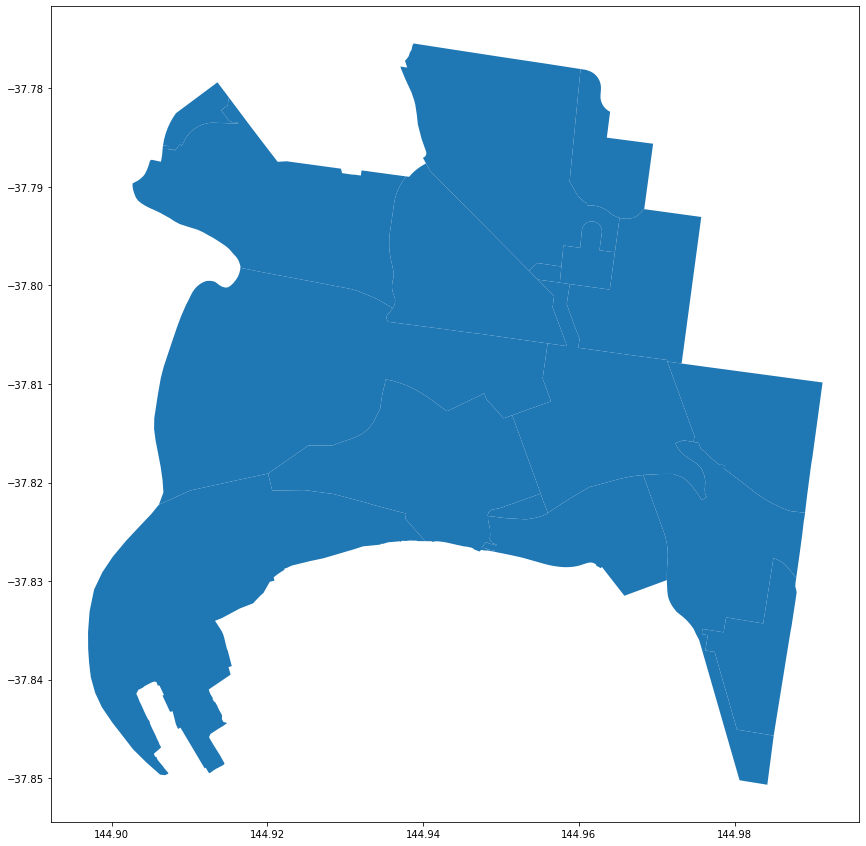

In [6]:
fig, ax=plt.subplots(figsize=(15,15))
melb_map.plot(ax=ax)

In [8]:
df=pd.read_csv(r'C:\Melbourne_Escooter\RealDataset\Results\July\Started\Filtered_starts\WithDateTime\maptest.csv')
crs={'init':'epsg:4326'}
df.head()

,bike_id,lat_1,lon_1,range_1,date:time_1
0,fed4898c-79c9-4f14-bb40-d25583462eaf,-37.79976,144.948637,10878.0,29:09:01
1,1b2c1c46-9d43-4eaa-9631-b43c2d8d6afc,NaN,NaN,NaN,29:09:01
2,71ea0882-022c-48b3-9d9f-d865c728b5e5,NaN,NaN,NaN,29:09:01
3,e8588e47-6d31-47e5-bc04-13fba9bc16e7,NaN,NaN,NaN,29:09:01
4,30746f1c-bfb9-4a70-a60c-7351eba02fdf,NaN,NaN,NaN,29:09:01


In [10]:
geometry=[Point(xy) for xy in zip( df["lon_1"], df["lat_1"])]

In [11]:
geo_df=gpd.GeoDataFrame(df, crs=crs, geometry=geometry)

C:\Users\s3923410\.conda\envs\geo_env\lib\site-packages\pyproj\crs\crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [12]:
geo_df.head()

,bike_id,lat_1,lon_1,range_1,date:time_1,geometry
0,fed4898c-79c9-4f14-bb40-d25583462eaf,-37.79976,144.948637,10878.0,29:09:01,POINT (144.94864 -37.79976)
1,1b2c1c46-9d43-4eaa-9631-b43c2d8d6afc,NaN,NaN,NaN,29:09:01,POINT EMPTY
2,71ea0882-022c-48b3-9d9f-d865c728b5e5,NaN,NaN,NaN,29:09:01,POINT EMPTY
3,e8588e47-6d31-47e5-bc04-13fba9bc16e7,NaN,NaN,NaN,29:09:01,POINT EMPTY
4,30746f1c-bfb9-4a70-a60c-7351eba02fdf,NaN,NaN,NaN,29:09:01,POINT EMPTY


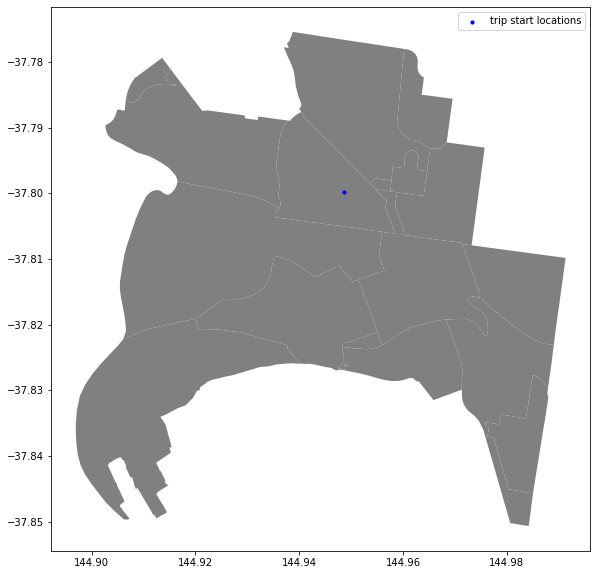

In [14]:
fig, ax =plt.subplots(figsize=(10,10))
melb_map.plot(ax=ax,color="grey")
geo_df.plot(ax=ax, markersize=10, color="blue",marker="o", label="trip start locations")
plt.legend(prop={'size':10})